In [1]:
import FEM
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget

In [7]:
coords = np.array([
    [0.0,0.0,0.0],
    [1.5,0.5,0.1],
    [1.0,1.3,1.0],
    [0.0,1.0,0.3]])
gdl = np.array([[-1,-1,-1,-1]])
e = FEM.Quadrilateral(coords=coords,gdl=gdl,n=5)

p = np.array([[0.5],[0.5],[1.0]]) #e.T(e.center.T)[0].T

In [3]:
_x, _p = e.T(e.domain.T)
_j, _dp = e.J(e.domain.T)

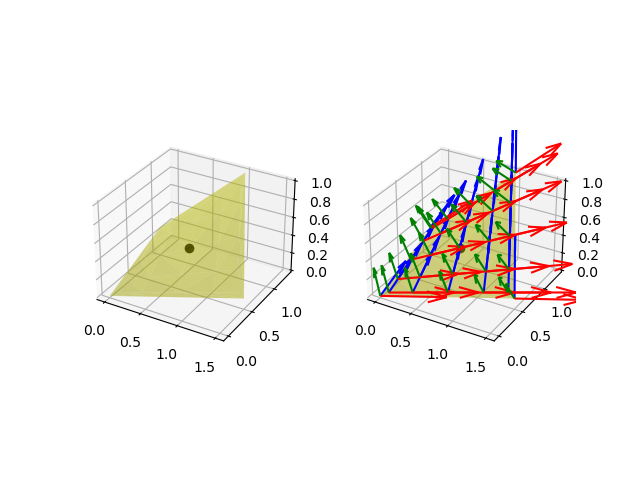

In [4]:
X,Y,Z = _x.T
u,v,w = _j[:,1,:].T
u2,v2,w2 = _j[:,0,:].T
u3,v3,w3 = np.cross(_j[:,0,:].T,_j[:,1,:].T,axis=0)
fig = plt.figure()
ax = fig.add_subplot(1,2,1,projection='3d')
ax.plot_trisurf(*_x.T,color='y',alpha=0.5)
ax.plot(*p,'o',c='black')
ax = fig.add_subplot(1,2,2,projection='3d')
ax.plot_trisurf(*_x.T,color='y',alpha=0.5)
ax.quiver(X,Y,Z,u,v,w,color='b')
ax.quiver(X,Y,Z,u2,v2,w2,color='r')
ax.quiver(X,Y,Z,u3,v3,w3,color='g')
ax.plot(*p,'o',c='black')

In [8]:
center, _ = e.T(e.center.T)
_j, _ = e.J(e.center.T)
n = np.cross(_j[:,0,:].T,_j[:,1,:].T,axis=0)
den = norm_mag = np.linalg.norm(n)
D = -np.dot(n.flatten(),center.flatten())
num = abs(np.dot(n.T.flatten(),p.flatten())+D)
d = num/den
print(d)

0.6559877381679284
